<a href="https://colab.research.google.com/github/ElenaBobro/hoom-work2-/blob/main/%D0%A4%D1%96%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Прогнозування ожиріння.
Оцінка рівня ожиріння у осіб.

Опис датасету: Цей датасет включає дані для оцінки рівня ожиріння у осіб з Мексики, Перу та Колумбії на основі їхніх звичок харчування та фізичного стану.

Gender: Стать

Age: Вік

Height: Зріст (в метрах)

Weight: Вага (в кілограмах)

family_history: Чи має хтось з вашої родини проблеми з надмірною вагою?

FAVC: Чи часто ви їсте калорійну їжу?

FCVC: Чи зазвичай ви їсте овочі під час прийому їжі?

NCP: Скільки основних прийомів їжі ви маєте щодня?

CAEC: Чи їсте ви між прийомами їжі?

SMOKE: Чи курите ви?

CH2O: Скільки води ви п’єте щодня?

SCC: Чи контролюєте ви кількість калорій, яку споживаєте щодня?

FAF: Як часто ви займаєтесь фізичною активністю?

TUE: Скільки часу ви проводите з технологічними пристроями, такими як мобільний телефон, відеоігри, телевізор, комп'ютер тощо?

CALC: Як часто ви вживаєте алкоголь?

MTRANS: Яким транспортом ви зазвичай користуєтесь?

Obesity_level (Цільова колонка): Рівень ожиріння (Недостатня вага, Нормальна вага, Надмірна вага I рівня, Надмірна вага II рівня, Ожиріння типу I, Ожиріння типу II, Ожиріння типу III.)

# Завантаження бібліотек та набору даних

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

df = pd.read_csv('/content/drive/MyDrive/Obesity prediction.csv')

In [85]:
# розмір датасета
df.shape
print(f'Набір містить {df.shape[0]} та {df.shape[1]} колонок.')

Набір містить 2111 та 17 колонок.


In [86]:
df #огляд набору даних

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Перевірка та очистка даних

In [87]:
# перевірка ну дублі
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


Я вважаю, що рядки відображають людей з однаковими даними, а не дублікати, оскільки люди можуть мати схожі або однакові характеристики. Наприклад, кілька осіб можуть мати однаковий вік, зріст, вагу, харчові звички та рівень фізичної активності. У цьому випадку, ці рядки не є дублями, а просто описують різних людей з ідентичними характеристиками.

In [88]:
# перевірка на порожні значення
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [89]:
#перевірка на типи
df.dtypes

,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


In [90]:
# змінемо тип даних я деяких колонках
df[['Age', 'FCVC', 'NCP']] = df[['Age', 'FCVC', 'NCP']].fillna(0).astype('int64')

In [91]:
# перевіоимо тип даних після зміни
df.dtypes

,0
Gender,object
Age,int64
Height,float64
Weight,float64
family_history,object
FAVC,object
FCVC,int64
NCP,int64
CAEC,object
SMOKE,object


In [92]:
# округлимо цифри після коми

df['Height'] = df['Height'].round(2)

df['Weight'] = df['Weight'].round(1)

df['CH2O'] = df['CH2O'].round(1)

df['FAF'] = df['FAF'].round(1)

df['TUE'] = df['TUE'].round(1)

In [93]:
# загальний вигляд даних
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [94]:
# вимкнення повідомлень про попередження
warnings.filterwarnings("ignore")

# Як рівень ожиріння розподіляється між чоловіками та жінками?

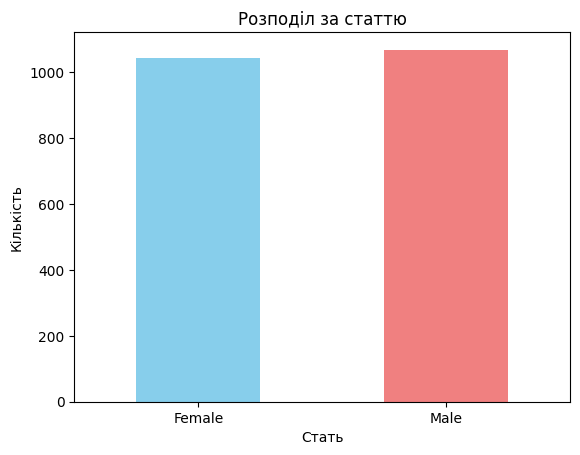

In [95]:
# Групуємо дані за Gender і підраховуємо кількість осіб в кожній групі
gender_counts = df.groupby('Gender').size()

gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Розподіл за статтю')
plt.xlabel('Стать')
plt.ylabel('Кількість')
plt.xticks(rotation=0)
plt.show()

Загальна кількість чоловіків і жінок у вибірці досить близька одна до одної, з невеликою перевагою на користь чоловіків.

In [97]:
# Створюємо таблицю, яка показує кількість осіб для кожної комбінації рівня ожиріння та статі
pivot_table_Gender = pd.pivot_table(df,
                             index='Obesity',
                             columns='Gender',
                             aggfunc='size',
                             )

display(pivot_table_Gender.style.background_gradient(axis=None, cmap='YlGnBu'))

Gender,Female,Male
Obesity,,
Insufficient_Weight,173,99
Normal_Weight,141,146
Obesity_Type_I,156,195
Obesity_Type_II,2,295
Obesity_Type_III,323,1
Overweight_Level_I,145,145
Overweight_Level_II,103,187


Схильність до певних рівнів ожиріння суттєво відрізняється між чоловіками та жінками. Жінки більше схильні до Obesity_Type_III, а чоловіки - до типу Obesity_Type_II.
В категоріях Insufficient_Weight і Normal_Weight розподіл більш збалансований між статями.

# Чи впливає вік, зріст і вага на рівень ожиріння?

In [24]:
# Перетворення категорій 'Obesity' на числові значення
obesity_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Obesity_Type_I': 2,
    'Obesity_Type_II': 3,
    'Obesity_Type_III': 4,
    'Overweight_Level_I': 5,
    'Overweight_Level_II': 6
}

df['Obesity_numeric'] = df['Obesity'].map(obesity_map)

In [25]:
# Перевірка кореляції між віком і рівнем ожиріння
correlation = df['Age'].corr(df['Obesity_numeric'])
print(f"Кореляція між віком та рівнем ожиріння: {correlation:.2f}")

Кореляція між віком та рівнем ожиріння: 0.23


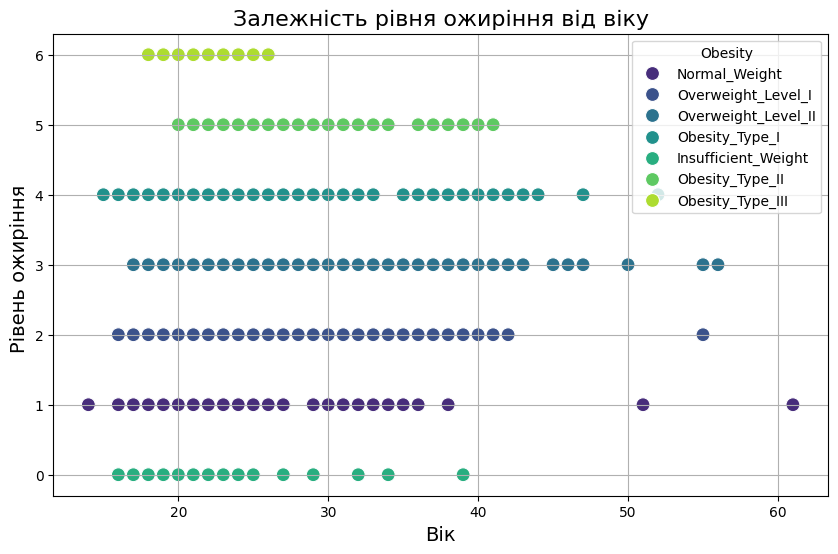

In [121]:
# Візуалізація залежності між віком і рівнем ожиріння
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x= 'Age', y= 'Obesity_numeric', hue='Obesity', palette='viridis', s=100)

plt.title('Залежність рівня ожиріння від віку', fontsize=16)
plt.xlabel('Вік', fontsize=14)
plt.ylabel('Рівень ожиріння ', fontsize=14)
plt.grid(True)
plt.show()

 Значення кореляції 0.23 вказує на слабкий позитивний зв'язок між віком та рівнем ожиріння. Це означає, що з підвищенням віку може дещо збільшуватися рівень ожиріння, але цей зв'язок є слабким і, ймовірно, не має великого впливу.

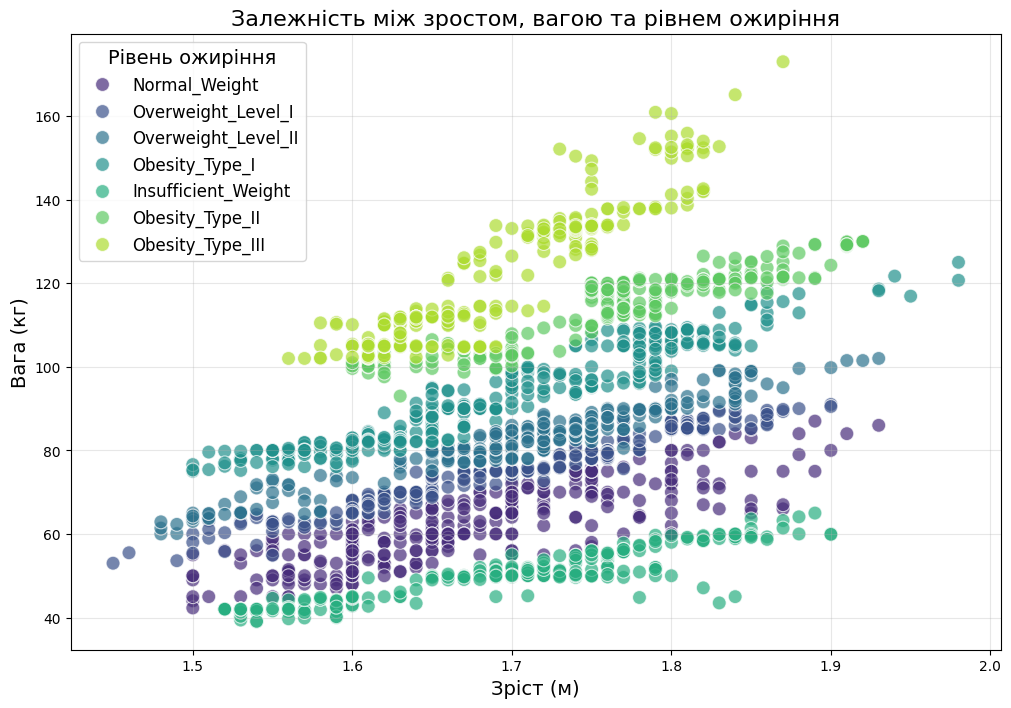

In [28]:
# Створення графіка розсіювання залежність між зростом, вагою та рівнем ожиріння
plt.figure(figsize=(12, 8))
sns.scatterplot(df,
    x="Height",
    y="Weight",
    hue="Obesity",
    palette="viridis",
    alpha=0.7,
    s=100
)

plt.title("Залежність між зростом, вагою та рівнем ожиріння", fontsize=16)
plt.xlabel("Зріст (м)", fontsize=14)
plt.ylabel("Вага (кг)", fontsize=14)
plt.legend(title="Рівень ожиріння", fontsize=12, title_fontsize=14)
plt.grid(alpha=0.3)
plt.show()

Вищі люди з нормальною вагою або невеликим ожирінням мають більш рівномірний розподіл ваги.
Натомість у людей з нижчим зростом частіше спостерігається підвищений рівень ожиріння, ймовірно через те, що навіть невелике збільшення ваги у цій групі призводить до вищого ІМТ.

# Чи залежить надмірна вага від спадковості?

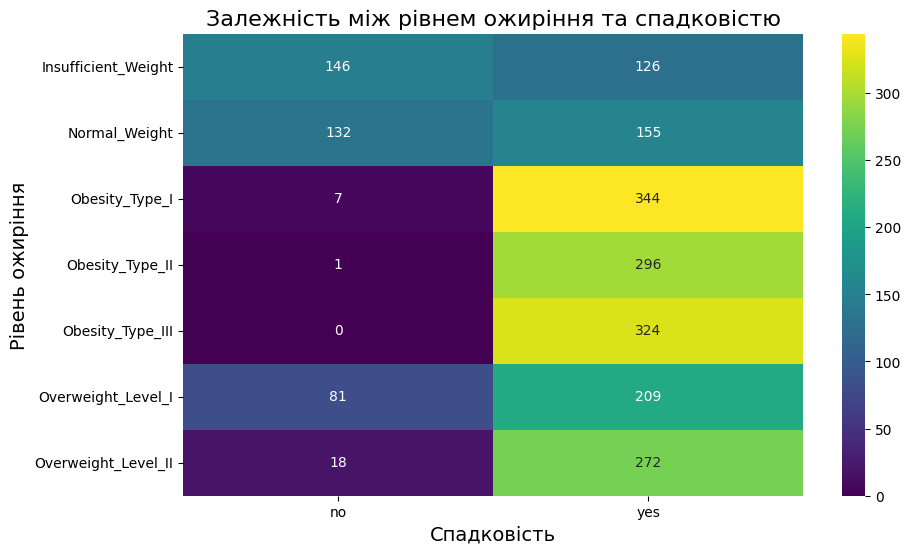

In [119]:
# Підрахунок кількості випадків для кожної комбінації Obesity і family_history
pivot_table = df.pivot_table(
    values='Weight',
    index='Obesity',
    columns='family_history',
    aggfunc='count',
    fill_value=0
)

# Побудова теплокарти
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="viridis", cbar=True)

plt.title('Залежність між рівнем ожиріння та спадковістю', fontsize=16)
plt.xlabel('Спадковість', fontsize=14)
plt.ylabel('Рівень ожиріння', fontsize=14)
plt.show()

Спадковість значно впливає на ймовірність розвитку ожиріння або надмірної ваги. Такі особи мають значно більшу ймовірність мати надмірну вагу порівняно з тими, у кого немає такої схильності.

# Чи є залежності між споживанням калорійної їжі та рівнем ожиріння?

In [39]:
df['FAVC_numeric'] = df['FAVC'].map({'yes': 1, 'no': 0})
correlation = df['FAVC_numeric'].corr(df['Obesity_numeric'])
print(f"Кореляція між споживанням калорійної їжі та рівнем ожиріння: {correlation:.2f}")

Кореляція між споживанням калорійної їжі та рівнем ожиріння: 0.04


 Є певний слабкий зв'язок між споживанням калорійної їжі та рівнем ожиріння, але він є недостатньо сильним, щоб робити однозначні висновки про вплив цієї змінної на ожиріння.

# Як впливає часте споживання овочів на ожиріння?

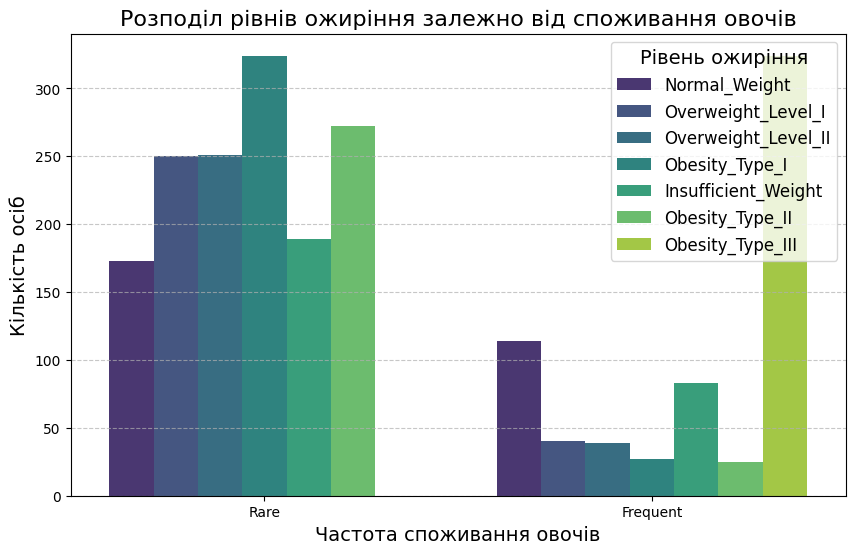

In [122]:
# Поділ на групи: часте споживання овочів (FCVC >= 3) і рідке (FCVC < 3)
df['Vegetable_Consumption'] = df['FCVC'].apply(lambda x: 'Frequent' if x >= 3 else 'Rare')

# Розподіл рівнів ожиріння за групами
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Vegetable_Consumption', hue='Obesity', palette='viridis')

plt.title('Розподіл рівнів ожиріння залежно від споживання овочів', fontsize=16)
plt.xlabel('Частота споживання овочів', fontsize=14)
plt.ylabel('Кількість осіб', fontsize=14)
plt.legend(title='Рівень ожиріння', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Часте споживання овочів саме по собі не є гарантією зниження рівня ожиріння. На це може впливати спосіб приготування овочів (наприклад, чи це сирі овочі, чи овочі, приготовлені з висококалорійними соусами).

# Чи є залежність між ожирінням і кількістю основних прийомів їжі?

In [105]:
# Обчислення кореляції між NCP і Obesity_numeric
correlation = df['NCP'].corr(df['Obesity_numeric'])
print(f"Кореляція між кількістю прийомів їжі на день і рівнем ожиріння: {correlation:.2f}")

Кореляція між кількістю прийомів їжі на день і рівнем ожиріння: 0.05


Зважаючи на низьку кореляцію, можна зробити висновок, що кількість основних прийомів їжі на день не є суттєвим фактором, що впливає на рівень ожиріння в даному наборі даних.

# Вплив перекусів на рівень ожиріння.

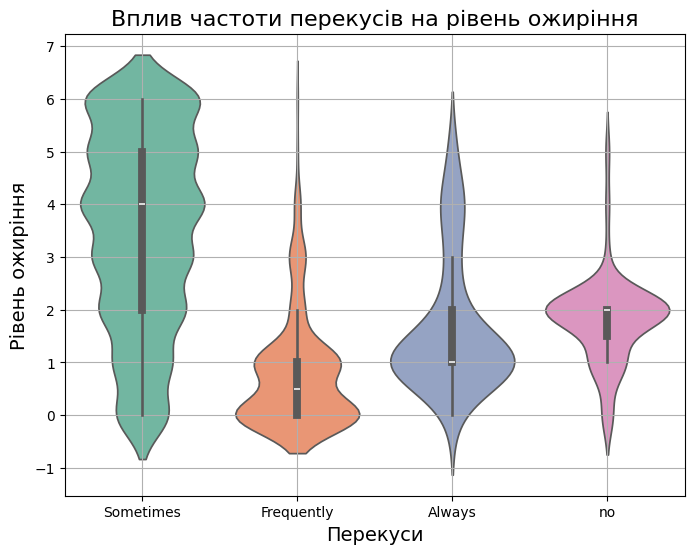

In [56]:
# Побудова графіку violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='CAEC', y='Obesity_numeric', palette='Set2')

plt.title('Вплив частоти перекусів на рівень ожиріння', fontsize=16)
plt.xlabel('Перекуси', fontsize=14)
plt.ylabel('Рівень ожиріння', fontsize=14)
plt.grid(True)

plt.show()

Частота перекусів має певний вплив на рівень ожиріння. Найбільше випадків високих рівнів ожиріння спостерігаються серед осіб, які часто перекушують. Це може свідчити про те, що часте споживання їжі між основними прийомами може бути пов'язане з більшим ризиком надмірної ваги та ожиріння.

# Як впливає кількіст води випитої щодня на ожиріння?

In [74]:
correlation_water_obesity = df['CH2O'].corr(df['Obesity_numeric'])
print(f"Кореляція між кількістю вживаної води та рівнем ожиріння: {correlation_water_obesity:.2f}")

Кореляція між кількістю вживаної води та рівнем ожиріння: 0.13


Зважаючи на кореляцію 0.13, можна сказати, що кількість вживаної води та рівень ожиріння не мають істотного лінійного зв'язку.

# Як часто займаються фізичною активністю люди з різними рівнями ожиріння?

In [109]:
# Створення зведеної таблиці
pivot_table_FAF = df.pivot_table(values='FAF', index='Obesity', aggfunc='mean')
pivot_table_FAF.style.format("{:.2f}").background_gradient(axis=None, cmap='YlGnBu')

,FAF
Obesity,
Insufficient_Weight,1.25
Normal_Weight,1.25
Obesity_Type_I,0.99
Obesity_Type_II,0.97
Obesity_Type_III,0.66
Overweight_Level_I,1.06
Overweight_Level_II,0.96


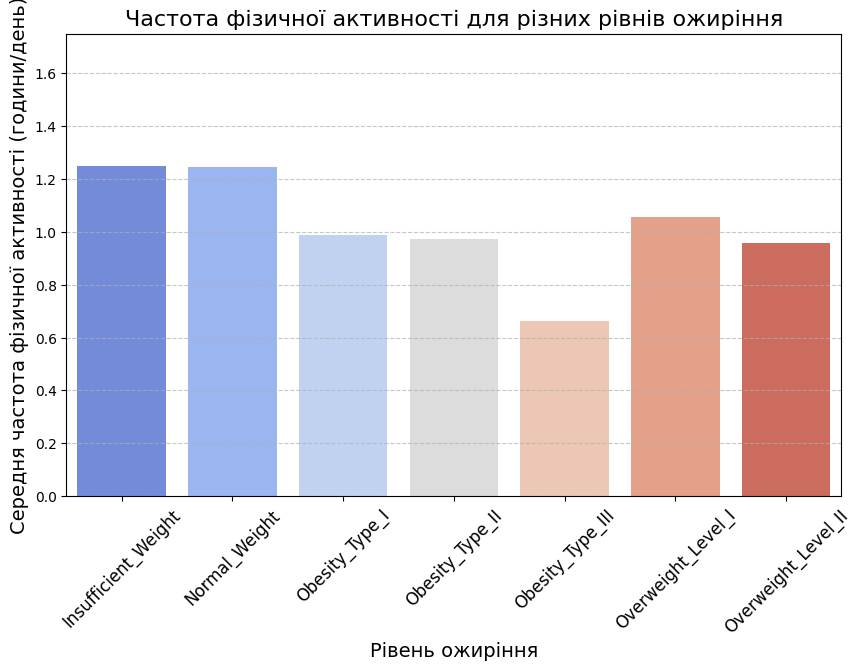

In [110]:
# Побудова графіка з використанням зведеної таблиці
plt.figure(figsize=(10, 6))
sns.barplot(x=pivot_table_FAF.index, y=pivot_table_FAF['FAF'], palette='coolwarm')

plt.title('Частота фізичної активності для різних рівнів ожиріння', fontsize=16)
plt.xlabel('Рівень ожиріння', fontsize=14)
plt.ylabel('Середня частота фізичної активності (години/день)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, pivot_table_3['FAF'].max() + 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Середня частота фізичної активності знижується зі збільшенням рівня ожиріння. Найвища активність спостерігається у людей із нормальною вагою та недостатньою вагою. У людей із рівнями ожиріння Obesity_Type_I та Obesity_Type_II фізична активність поступово зменшується. Найменша середня активність у людей з Obesity_Type_III, що може вказувати на значну втрату фізичної активності на високих рівнях ожиріння.
 На високих рівнях ожиріння (наприклад, Obesity_Type_III) фізична активність може бути утрудненою через фізичний дискомфорт, хронічні захворювання або низький рівень енергії.Люди з нормальною або недостатньою вагою мають кращі можливості для підтримки фізичної активності.

# Як часто вживають алкоголь люди з різними рівнями ожиріння?

In [117]:
grouped_calc_obesity = df.groupby(['CALC', 'Obesity']).size().unstack().fillna(0).round(0).astype(int)

styled_table = grouped_calc_obesity.style.background_gradient(cmap='YlGnBu')
styled_table

Obesity,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CALC,,,,,,,
Always,0,1,0,0,0,0,0
Frequently,1,18,14,2,0,16,19
Sometimes,154,161,172,224,323,224,143
no,117,107,165,71,1,50,128


Частота вживання алкоголю є не високою серед усіх рівнів ожиріння. Найбільше людей інколи вживають алкоголь, незалежно від вагової категорії. Категорії "Always" і "Frequently" дуже рідко зустрічаються, що свідчить про відносно низький рівень регулярного вживання алкоголю у вибірці. Це може вказувати на слабкий зв'язок між частотою вживання алкоголю та рівнем ожиріння.

# Чи є зв'язок між використанням різних видів транспорту та рівнем ожиріння?

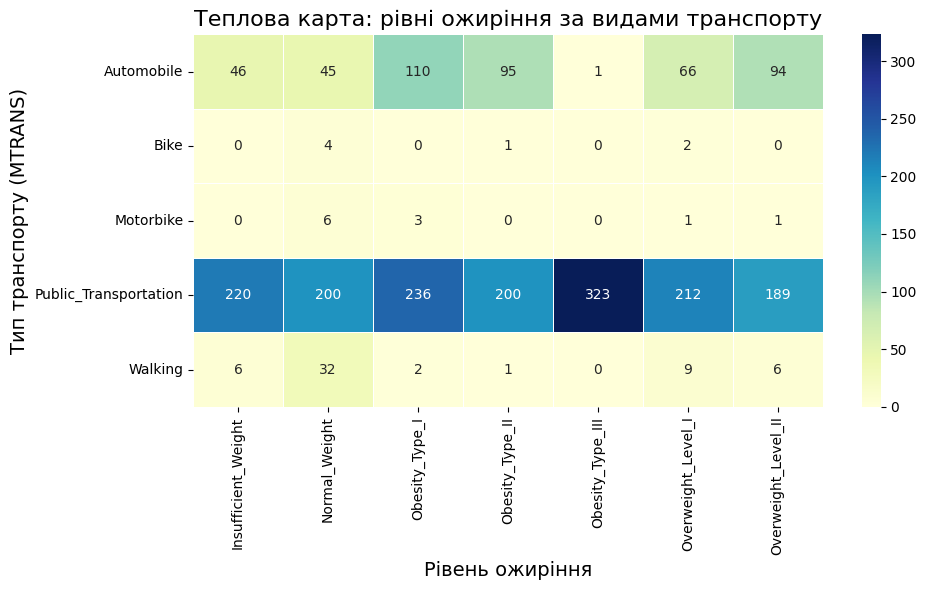

In [111]:
grouped_transport = df.groupby(['MTRANS', 'Obesity']).size().unstack().fillna(0)

# Побудова теплової карти
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_transport, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.title('Теплова карта: рівні ожиріння за видами транспорту', fontsize=16)
plt.xlabel('Рівень ожиріння', fontsize=14)
plt.ylabel('Тип транспорту (MTRANS)', fontsize=14)
plt.tight_layout()
plt.show()

Громадський транспорт є домінуючим видом транспорту серед усіх рівнів ожиріння.
Люди з вищими рівнями ожиріння частіше обирають автомобілі, що може свідчити про зменшення фізичної активності.
Ходьба пішки та використання велосипедів поширені серед людей із нормальною вагою та недостатньою вагою, але майже відсутні у категоріях з вищим рівнем ожиріння.
Вибір транспорту має зв’язок із рівнем ожиріння. Засоби пересування, які потребують мінімальної фізичної активності (громадський транспорт, автомобілі), частіше обирають люди з надмірною вагою або ожирінням. У той час як активні види транспорту (піша хода, велосипеди) є характерними для людей із нормальною вагою чи недостатньою вагою